<a href="https://colab.research.google.com/github/AnkanaSonowal/Employee-Attrition-Prediction/blob/main/Week6AttritionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# from imblearn.over_sampling import SMOTE  # SMOTE
# sklearn modules for ML model selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Libraries for data modelling
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# from sklearn.datasets import make_classification

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, make_scorer
from sklearn.metrics import average_precision_score

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
trainLink='https://drive.google.com/file/d/1sSLlz1TtO1R-imBS2DDtLM2_UC38DtVv/view?usp=sharing'
https://drive.google.com/file/d/1sSLlz1TtO1R-imBS2DDtLM2_UC38DtVv/view?usp=sharing

In [ ]:
testLink='https://drive.google.com/file/d/1iynELZazvlVI3r9kpFT5X9yiRbqK2B5A/view?usp=sharing'

In [ ]:
fluff, id1 = trainLink.split('=')
id1='1sSLlz1TtO1R-imBS2DDtLM2_UC38DtVv'
print (id1)

1sSLlz1TtO1R-imBS2DDtLM2_UC38DtVv


In [ ]:
downloaded = drive.CreateFile({'id':id1}) 
downloaded.GetContentFile('train.csv')  
df1 = pd.read_csv('train.csv')

In [ ]:
fluff, id2 = testLink.split('=')
id2='1iynELZazvlVI3r9kpFT5X9yiRbqK2B5A'
print (id2)

1iynELZazvlVI3r9kpFT5X9yiRbqK2B5A


In [ ]:
downloaded = drive.CreateFile({'id':id2}) 
downloaded.GetContentFile('test.csv')  
df2 = pd.read_csv('test.csv')

In [ ]:
df1.head()

In [ ]:
len(df1)

1628

In [ ]:
df_train = df1.copy()

In [ ]:
df_test = df2.copy()

In [ ]:
df_train.columns.to_series().groupby(df_train.dtypes).groups

{dtype('int64'): Index(['Id', 'Age', 'Attrition', 'DistanceFromHome', 'Education',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'JobInvolvement',
        'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked',
        'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
        'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
        'CommunicationSkill', 'Behaviour'],
       dtype='object'),
 dtype('O'): Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
        'MaritalStatus', 'OverTime'],
       dtype='object')}

In [ ]:
df_test.columns.to_series().groupby(df_test.dtypes).groups

{dtype('int64'): Index(['Id', 'Age', 'DistanceFromHome', 'Education', 'EmployeeNumber',
        'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
        'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating', 'StockOptionLevel', 'TotalWorkingYears',
        'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager', 'CommunicationSkill',
        'Behaviour'],
       dtype='object'),
 dtype('O'): Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
        'MaritalStatus', 'OverTime'],
       dtype='object')}

In [ ]:
df_train.info()

In [ ]:
df_test.info()

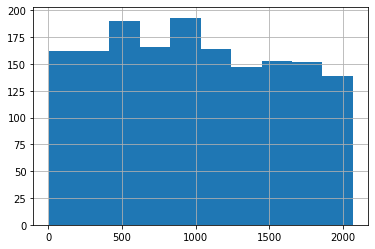

In [ ]:
df_train['EmployeeNumber'].hist()

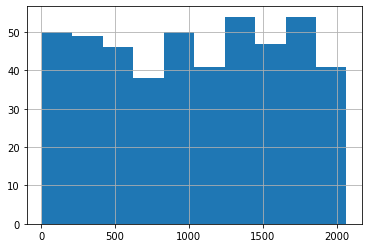

In [ ]:
df_test['EmployeeNumber'].hist()

In [ ]:
type(df_test['EmployeeNumber'])

pandas.core.series.Series

In [ ]:
rows=[]
for i in range(len(df_train)):
  rows.append(df_train['EmployeeNumber'][i])
for i in range(len(df_test)):
  rows.append(df_test['EmployeeNumber'][i])


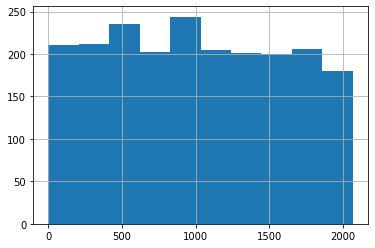

In [ ]:
x=pd.Series(rows)
x.hist()

In [ ]:
len(x)

2098

In [ ]:
df_train.drop(['Id','Behaviour'], axis=1, inplace=True)

In [ ]:
len(df_train.columns)

27

In [ ]:
df_train.head()

In [ ]:
df_test.drop(['Id','Behaviour'], axis=1, inplace=True)

In [ ]:
len(df_test.columns)

26

In [ ]:
df_test.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
0,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,3,Research Scientist,4,Married,2070,1,No,23,4,1,5,3,5,2,0,4,5
1,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,4,Sales Executive,4,Divorced,5460,4,No,22,4,2,13,4,7,7,5,7,3
2,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,4,Research Scientist,1,Divorced,5974,4,Yes,13,3,2,13,2,7,7,6,7,4
3,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,2,Manufacturing Director,4,Married,6062,9,Yes,13,3,1,8,4,4,3,0,2,5
4,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,3,Laboratory Technician,2,Married,4447,1,No,12,3,0,9,5,9,7,0,8,2


In [ ]:
#find all unique values of the string columns
#'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole','MaritalStatus', 'OverTime'
l=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole','MaritalStatus', 'OverTime']
for i in range(len(l)):
  print(str(df_train[l[i]].unique()))
  print(str(df_test[l[i]].unique()))

['Non-Travel' 'Travel_Rarely' 'Travel_Frequently']
['Travel_Rarely' 'Non-Travel' 'Travel_Frequently']
['Research & Development' 'Sales' 'Human Resources']
['Research & Development' 'Sales' 'Human Resources']
['Medical' 'Life Sciences' 'Other' 'Marketing' 'Technical Degree'
 'Human Resources']
['Medical' 'Life Sciences' 'Human Resources' 'Technical Degree'
 'Marketing' 'Other']
['Female' 'Male']
['Male' 'Female']
['Laboratory Technician' 'Manufacturing Director' 'Sales Executive'
 'Research Scientist' 'Sales Representative' 'Healthcare Representative'
 'Research Director' 'Human Resources' 'Manager']
['Research Scientist' 'Sales Executive' 'Manufacturing Director'
 'Laboratory Technician' 'Healthcare Representative' 'Human Resources'
 'Manager' 'Research Director' 'Sales Representative']
['Single' 'Married' 'Divorced']
['Married' 'Divorced' 'Single']
['No' 'Yes']
['No' 'Yes']


In [ ]:
df_train.drop('EmployeeNumber', axis=1, inplace=True)

In [ ]:
df_test.drop('EmployeeNumber', axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [ ]:

print(df_train.shape)
df_train.head()

(1628, 26)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
0,30,0,Non-Travel,Research & Development,2,3,Medical,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4
1,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2
2,55,1,Travel_Rarely,Sales,2,1,Medical,3,Male,3,Sales Executive,4,Single,5160,4,No,16,3,0,12,3,9,7,7,3,5
3,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,1,Male,3,Research Scientist,4,Single,4108,7,No,13,3,0,18,2,7,7,1,7,4
4,37,0,Travel_Rarely,Research & Development,3,3,Other,3,Male,3,Manufacturing Director,3,Married,9434,1,No,15,3,1,10,2,10,7,7,8,1


In [ ]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
he_count = 0
for col in df_train.columns:
    if df_train[col].dtype == 'object':
        if len(list(df_train[col].unique())) <= 2:
            le.fit(df_train[col])
            df_train[col] = le.transform(df_train[col])
            le_count += 1
        elif len(list(df_train[col].unique())) > 2:
          df_train = pd.get_dummies(df_train, prefix=[col], columns=[col])
          he_count+=1
print('{} columns were label encoded.'.format(le_count))
print('{} columns were one hot encoded.'.format(he_count))

2 columns were label encoded.
5 columns were one hot encoded.


In [ ]:
# df_train = pd.get_dummies(df_train, drop_first=True)

In [ ]:

print(df_train.shape)
df_train.head()

(1628, 45)


,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,30,0,2,3,3,0,3,4,2564,0,0,14,3,0,12,2,11,7,6,7,4,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,36,0,12,4,3,0,3,3,4663,9,1,12,3,2,7,2,3,2,1,1,2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,55,1,2,1,3,1,3,4,5160,4,0,16,3,0,12,3,9,7,7,3,5,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,39,0,24,1,1,1,3,4,4108,7,0,13,3,0,18,2,7,7,1,7,4,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,37,0,3,3,3,1,3,3,9434,1,0,15,3,1,10,2,10,7,7,8,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:

print(df_test.shape)
df_test.head()

(470, 25)


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill
0,28,Travel_Rarely,Research & Development,9,3,Medical,4,Male,3,Research Scientist,4,Married,2070,1,No,23,4,1,5,3,5,2,0,4,5
1,31,Travel_Rarely,Sales,6,4,Medical,1,Male,4,Sales Executive,4,Divorced,5460,4,No,22,4,2,13,4,7,7,5,7,3
2,37,Travel_Rarely,Research & Development,6,3,Medical,3,Male,4,Research Scientist,1,Divorced,5974,4,Yes,13,3,2,13,2,7,7,6,7,4
3,42,Travel_Rarely,Research & Development,1,2,Life Sciences,4,Female,2,Manufacturing Director,4,Married,6062,9,Yes,13,3,1,8,4,4,3,0,2,5
4,45,Non-Travel,Research & Development,4,2,Life Sciences,3,Male,3,Laboratory Technician,2,Married,4447,1,No,12,3,0,9,5,9,7,0,8,2


In [ ]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
he_count = 0
for col in df_test.columns:
    if df_test[col].dtype == 'object':
        if len(list(df_test[col].unique())) <= 2:
            le.fit(df_test[col])
            df_test[col] = le.transform(df_test[col])
            le_count += 1
        elif len(list(df_test[col].unique())) > 2:
          df_test = pd.get_dummies(df_test, prefix=[col], columns=[col])
          he_count+=1
print('{} columns were label encoded.'.format(le_count))
print('{} columns were one hot encoded.'.format(he_count))

2 columns were label encoded.
5 columns were one hot encoded.


In [ ]:

print(df_test.shape)
df_test.head()

(470, 44)


,Age,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,28,9,3,4,1,3,4,2070,1,0,23,4,1,5,3,5,2,0,4,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,31,6,4,1,1,4,4,5460,4,0,22,4,2,13,4,7,7,5,7,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,37,6,3,3,1,4,1,5974,4,1,13,3,2,13,2,7,7,6,7,4,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,42,1,2,4,0,2,4,6062,9,1,13,3,1,8,4,4,3,0,2,5,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,45,4,2,3,1,3,2,4447,1,0,12,3,0,9,5,9,7,0,8,2,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [ ]:
df_train.to_csv('trainEncoded.csv')

In [ ]:
df_test.to_csv('testEncoded.csv')

In [ ]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df_train.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df_train[col] = df_train[col].astype(float)
    df_train[[col]] = scaler.fit_transform(df_train[[col]])
df_train['Attrition'] = pd.to_numeric(df_train['Attrition'], downcast='float')
df_train.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.428571,0.0,0.178571,2.50,3.333333,0.0,3.333333,5.000000,0.409426,0.000000,0.0,1.071429,0.0,0.000000,1.578947,1.666667,1.486486,1.944444,2.000000,2.058824,3.75,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1,2.142857,0.0,1.964286,3.75,3.333333,0.0,3.333333,3.333333,0.962085,5.000000,5.0,0.357143,0.0,3.333333,0.921053,1.666667,0.405405,0.555556,0.333333,0.294118,1.25,0.0,0.0,5.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
2,4.404762,1.0,0.178571,0.00,3.333333,5.0,3.333333,5.000000,1.092944,2.222222,0.0,1.785714,0.0,0.000000,1.578947,2.500000,1.216216,1.944444,2.333333,0.882353,5.00,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0
3,2.500000,0.0,4.107143,0.00,0.000000,5.0,3.333333,5.000000,0.815956,3.888889,0.0,0.714286,0.0,0.000000,2.368421,1.666667,0.945946,1.944444,0.333333,2.058824,3.75,0.0,0.0,5.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0
4,2.261905,0.0,0.357143,2.50,3.333333,5.0,3.333333,3.333333,2.218273,0.555556,0.0,1.428571,0.0,1.666667,1.315789,1.666667,1.351351,1.944444,2.333333,2.352941,0.00,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [ ]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df_test.columns)
# HR_col.remove('Attrition')
for col in HR_col:
    df_test[col] = df_test[col].astype(float)
    df_test[[col]] = scaler.fit_transform(df_test[[col]])
# df_test['Attrition'] = pd.to_numeric(df_test['Attrition'], downcast='float')
df_test.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.190476,1.428571,2.50,5.000000,5.0,3.333333,5.000000,0.259654,0.555556,0.0,4.285714,5.0,1.666667,0.625,2.500000,0.625,0.588235,0.000000,1.176471,5.00,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0
1,1.547619,0.892857,3.75,0.000000,5.0,5.000000,5.000000,1.158763,2.222222,0.0,3.928571,5.0,3.333333,1.625,3.333333,0.875,2.058824,1.666667,2.058824,2.50,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0
2,2.261905,0.892857,2.50,3.333333,5.0,5.000000,0.000000,1.295088,2.222222,5.0,0.714286,0.0,3.333333,1.625,1.666667,0.875,2.058824,2.000000,2.058824,3.75,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0
3,2.857143,0.000000,1.25,5.000000,0.0,1.666667,5.000000,1.318428,5.000000,5.0,0.714286,0.0,1.666667,1.000,3.333333,0.500,0.882353,0.000000,0.588235,5.00,0.0,0.0,5.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
4,3.214286,0.535714,1.25,3.333333,5.0,3.333333,1.666667,0.890091,0.555556,0.0,0.357143,0.0,0.000000,1.125,4.166667,1.125,2.058824,0.000000,2.352941,1.25,5.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [ ]:
#to get y_train
y_train = df_train['Attrition'].copy()

In [ ]:
#to get X_train
t1=df_train.copy()
t1.drop('Attrition',axis=1,inplace=True)
X_train=t1.copy()

In [ ]:
#to get X_test
X_test=df_test.copy()

In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
# print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1628, 44)
Number transactions y_train dataset:  (1628,)
Number transactions X_test dataset:  (470, 44)


In [ ]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))

In [ ]:
y_train.value_counts()

0.0    843
1.0    785
Name: Attrition, dtype: int64

In [ ]:
len(y_train.unique())

2

In [ ]:
from sklearn.utils import shuffle

In [ ]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    X_s, y_s = shuffle(X_train, y_train)
    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_s, y_s, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
1,Random Forest,100.00,0.00,97.79,1.86
2,SVM,99.87,0.34,97.61,1.85
4,Decision Tree Classifier,94.20,2.66,93.56,4.89
3,KNN,87.77,2.37,84.85,12.11
0,Logistic Regression,86.97,2.54,79.55,2.85
5,Gaussian NB,75.69,3.03,61.04,25.65


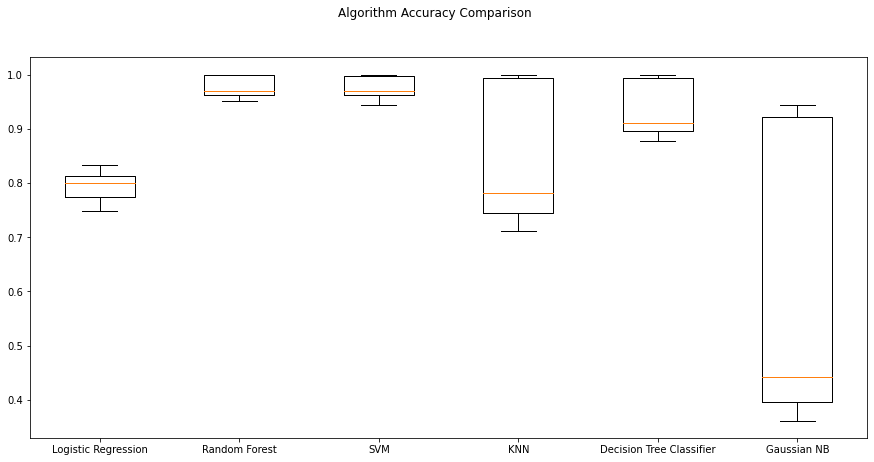

In [ ]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()


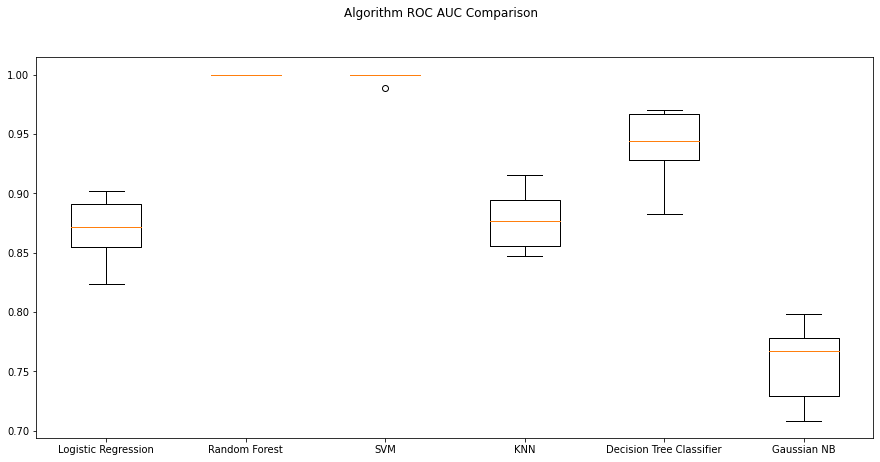

In [ ]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        iid=True,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)

best params: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)
best params: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
best score: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


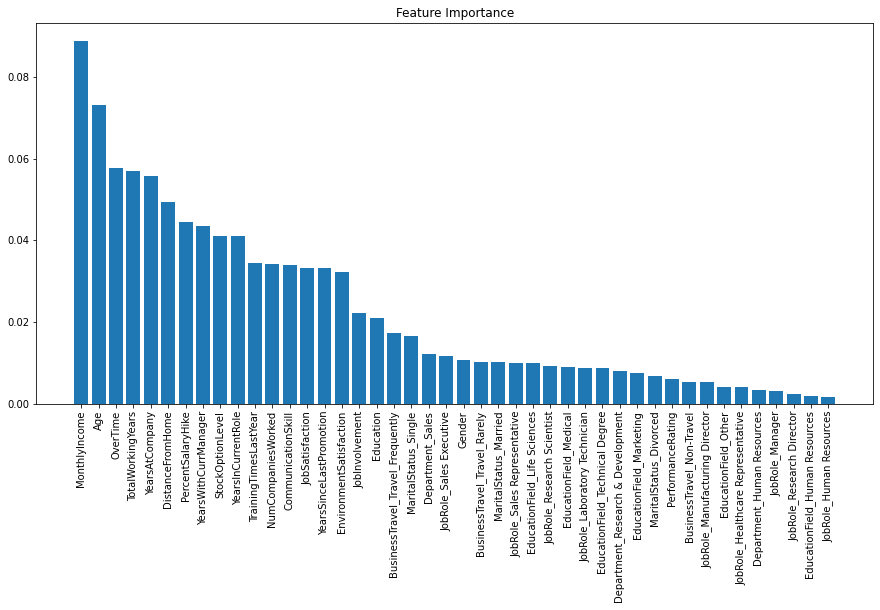

In [ ]:
importances = rf_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
importances = rf_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MonthlyIncome,0.088801
1,Age,0.073241
2,OverTime,0.057732
3,TotalWorkingYears,0.056990
4,YearsAtCompany,0.055701
5,DistanceFromHome,0.049369
6,PercentSalaryHike,0.044433
7,YearsWithCurrManager,0.043437
8,StockOptionLevel,0.041085
9,YearsInCurrentRole,0.041049


In [ ]:
y_test=rf_opt.predict(X_test)

In [ ]:
y_test2=rf_opt.predict_proba(X_test)

In [ ]:
y_test2

In [ ]:
predict_y=y_test2[:,1]
predict_y

In [ ]:
f1=[]
for i in range(len(df2)):
  f1.append({'Id':str(df2['Id'][i]),'Attrition':str(predict_y[i])})

In [ ]:
new_data = pd.DataFrame(f1,columns=['Id','Attrition'])
#clean_data['target'] = df.sentiment
new_data.head()

,Id,Attrition
0,1,0.08
1,2,0.12
2,3,0.08
3,4,0.14
4,5,0.09731302413143933


In [ ]:
new_data.to_csv('submission_1.csv',encoding='utf-8',index=False)

In [ ]:
rf_opt.classes_

array([0., 1.], dtype=float32)

In [ ]:
neg =0
pos=0
for i in range(len(predict_y)):
  if(predict_y[i]>=0.5):
    pos+=1
  else:
    neg+=1
print("pos: "+ str(pos) + "neg: "+ str(neg))

pos: 28neg: 442


In [ ]:
from sklearn.svm import SVC
classifier3 = SVC(kernel='rbf',random_state=0,probability=True)
classifier3.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
# # from sklearn.model_selection import GridSearchCV 
# classifier3 = SVC(kernel='rbf',random_state=0,probability=True)
# # defining parameter range 
# param_grid = {'C': [0.1, 1, 10, 100, 1000],  
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
#               'kernel': ['rbf']}  
  
# svc_grid = GridSearchCV(classifier3, param_grid, refit = True, verbose = 3) 
  
# # fitting the model for grid search 
# svc_fit=svc_grid.fit(X_train, y_train) 
# svc_opt=svc_fit.best_estimator_
# print('='*20)
# print("best params: " + str(svc_grid.best_estimator_))
# print("best params: " + str(svc_grid.best_params_))
# print('best score:', svc_grid.best_score_)
# print('='*20)

In [ ]:
y_test3=classifier3.predict_proba(X_test)

In [ ]:
y_test3

In [ ]:
row3=[]
for i in range(len(y_test3)):
  row3.append(float(y_test3[i][1]))
  # y_test4[i][1]=float(y_test4[i][1])

In [ ]:
#getting e^-2 etc etc
neg =0
pos=0
for i in range(len(row3)):
  if(row3[i]>=0.5):
    pos+=1
  else:
    neg+=1
print("pos: "+ str(pos) + "neg: "+ str(neg))

pos: 86neg: 384


In [ ]:
f3=[]
for i in range(len(df2)):
  f3.append({'Id':str(df2['Id'][i]),'Attrition':str(row3[i])})

In [ ]:
new_data_svc = pd.DataFrame(f3,columns=['Id','Attrition'])
#clean_data['target'] = df.sentiment
new_data_svc.head()

,Id,Attrition
0,1,0.019612277236078633
1,2,0.04200392811175258
2,3,0.21912886576796825
3,4,0.047633689328674386
4,5,0.0066686020588893336


In [ ]:
new_data_svc.to_csv('submission_3.csv',encoding='utf-8',index=False)

In [ ]:
from xgboost import XGBClassifier
classifier4 = XGBClassifier(n_estimators=300)
classifier4.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_test4=classifier4.predict_proba(X_test)

In [ ]:
classifier4.classes_

array([0., 1.], dtype=float32)

In [ ]:
row4=[]
for i in range(len(y_test4)):
  row4.append(float(y_test4[i][1]))
  # y_test4[i][1]=float(y_test4[i][1])

In [ ]:
row4

In [ ]:
#getting e^-2 etc etc
neg =0
pos=0
for i in range(len(row4)):
  if(row4[i]>=0.5):
    pos+=1
  else:
    neg+=1
print("pos: "+ str(pos) + "neg: "+ str(neg))

pos: 75neg: 395


In [ ]:
f2=[]
for i in range(len(df2)):
  f2.append({'Id':str(df2['Id'][i]),'Attrition':str(row4[i])})

In [ ]:
new_data_xb = pd.DataFrame(f2,columns=['Id','Attrition'])
#clean_data['target'] = df.sentiment
new_data_xb.head()

,Id,Attrition
0,1,0.024090223014354706
1,2,0.004934804514050484
2,3,0.017882104963064194
3,4,0.017280852422118187
4,5,0.005639784969389439


In [ ]:
new_data_xb.to_csv('submission_2.csv',encoding='utf-8',index=False)

In [ ]:
#logistic regression
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression(solver='liblinear',
                             class_weight="balanced", 
                             random_state=7)
scoring = 'roc_auc'
X_s,y_s =shuffle(X_train,y_train)
results = model_selection.cross_val_score(
    modelCV, X_s, y_s, cv=kfold, scoring=scoring)
print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AUC score (STD): 0.87 (0.02)


In [ ]:
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      iid=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

log_grid = log_gs.fit(X_train, y_train)
log_opt = log_grid.best_estimator_
results = log_gs.cv_results_

print('='*20)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('='*20)

best params: LogisticRegression(C=0.5109999999999999, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 0.5109999999999999}
best score: 0.8773369128171808


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [ ]:
y_test5=log_opt.predict_proba(X_test)

In [ ]:
y_test5

In [ ]:
row5=[]
for i in range(len(y_test5)):
  row5.append(float(y_test5[i][1]))
  # y_test4[i][1]=float(y_test4[i][1])

f4=[]
for i in range(len(df2)):
  f4.append({'Id':str(df2['Id'][i]),'Attrition':str(row5[i])})


In [ ]:
new_data_lg = pd.DataFrame(f4,columns=['Id','Attrition'])
#clean_data['target'] = df.sentiment
new_data_lg.head()

,Id,Attrition
0,1,0.06354078348563504
1,2,0.04429957133284665
2,3,0.48775184714559505
3,4,0.26736355131526657
4,5,0.00840793017642072


In [ ]:
new_data_lg.to_csv('submission_4.csv',encoding='utf-8',index=False)